<a href="https://colab.research.google.com/github/djm3622/bayesDL/blob/main/canerproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
andf = pd.read_csv('/content/drive/MyDrive/LUNA16/annotations.csv')
candf = pd.read_csv('/content/drive/MyDrive/LUNA16/candidates_V2.csv')

In [ ]:
andf

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
...,...,...,...,...,...
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-160.856298,-28.560349,-269.168728,5.053694
1182,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.189570,-73.865766,-220.536241,4.556101
1183,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-37.535409,64.041949,-127.687101,4.357368
1184,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,43.196112,74.438486,-200.523314,4.277203


In [ ]:
candf

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0
...,...,...,...,...,...
754970,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-33.400000,-64.200000,-115.560000,0
754971,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,56.236359,70.352400,-203.446236,0
754972,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-97.104221,55.738289,-203.879785,0
754973,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-65.470000,59.670000,-136.370000,0


In [ ]:
candf['class'].value_counts() / candf.shape[0] * 100

0    99.793768
1     0.206232
Name: class, dtype: float64

In [ ]:
(candf['class'] == 1).sum(), andf.shape[0]

(1557, 1186)

In [ ]:
andf['seriesuid'].value_counts().describe()

count    601.000000
mean       1.973378
std        1.483000
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: seriesuid, dtype: float64

In [ ]:
ex_pos = candf[candf['class'] == 1].iloc[1]['seriesuid']

In [ ]:
andf[andf['seriesuid'] == ex_pos]

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708


In [ ]:
mhd_path = f'/content/drive/MyDrive/LUNA16/subset0/{ex_pos}.mhd'
raw_path = f'/content/drive/MyDrive/LUNA16/subset0/{ex_pos}.raw'

*Functools used to cache result of function in memory.*

In [ ]:
import glob
import functools
import os
import csv
from collections import namedtuple

CandidateInfoTuple = namedtuple(
    'CandidateInfoTuple',
    'isNodule_bool, diameter_mm, series_uid, center_xyz',
)

@functools.lru_cache(1)
def getCandidateInfoList(requireOnDisk_bool=True):
  # We construct a set with all series_uids that are present on disk.
  # This will let us use the data, even if we haven't downloaded all of
  # the subsets yet.
  mhd_list = glob.glob('/content/drive/MyDrive/LUNA16/subset*/*.mhd')
  presentOnDisk_set = {os.path.split(p)[-1][:-4] for p in mhd_list}  # gets series number

  # loop through annotations, get uid, tuple of center, float of diameter
  # set hash in dict, using uid as key, value as list of tuple of (centers, diameters)
  diameter_dict = {}
  with open('/content/drive/MyDrive/LUNA16/annotations.csv', "r") as f:
    for row in list(csv.reader(f))[1:]:
      series_uid = row[0]
      annotationCenter_xyz = tuple([float(x) for x in row[1:4]])
      annotationDiameter_mm = float(row[4])

      diameter_dict.setdefault(series_uid, []).append(
        (annotationCenter_xyz, annotationDiameter_mm)
      )

  # loop through all, check if nodule, get center
  # get annotation center, compute difference in xyz (indvidually)
  # if difference less than 1/4 diameter then consider both the same and set equal

  candidateInfo_list = []
  with open('/content/drive/MyDrive/LUNA16/candidates_V2.csv', "r") as f:
    for row in list(csv.reader(f))[1:]:
      series_uid = row[0]

      # skip instance if dont have image
      if series_uid not in presentOnDisk_set and requireOnDisk_bool:
        continue

      isNodule_bool = bool(int(row[4]))
      candidateCenter_xyz = tuple([float(x) for x in row[1:4]])

      candidateDiameter_mm = 0.0
      for annotation_tup in diameter_dict.get(series_uid, []):
        annotationCenter_xyz, annotationDiameter_mm = annotation_tup
        for i in range(3):
          delta_mm = abs(candidateCenter_xyz[i] - annotationCenter_xyz[i])
          if delta_mm > annotationDiameter_mm / 4:
            break
          else:
            candidateDiameter_mm = annotationDiameter_mm
            break

      # append label, diameter, id, and center
      candidateInfo_list.append(CandidateInfoTuple(
        isNodule_bool,
        candidateDiameter_mm,
        series_uid,
        candidateCenter_xyz
      ))

  candidateInfo_list.sort(reverse=True)
  return candidateInfo_list

In [ ]:
! pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
IrcTuple = namedtuple('IrcTuple', ['index', 'row', 'col'])
XyzTuple = namedtuple('XyzTuple', ['x', 'y', 'z'])

def irc2xyz(coord_irc, origin_xyz, vxSize_xyz, direction_a):
    cri_a = np.array(coord_irc)[::-1]       # patient coord
    origin_a = np.array(origin_xyz)         # get origin
    vxSize_a = np.array(vxSize_xyz)         # get spacing
    coords_xyz = (direction_a @ (cri_a * vxSize_a)) + origin_a      # scale, dot, offset
    return XyzTuple(*coords_xyz)

def xyz2irc(coord_xyz, origin_xyz, vxSize_xyz, direction_a):
  origin_a = np.array(origin_xyz)           # get origin
  vxSize_a = np.array(vxSize_xyz)           # get spacing
  coord_a = np.array(coord_xyz)             # cord space
  cri_a = ((coord_a - origin_a) @ np.linalg.inv(direction_a)) / vxSize_a  # subtract offset, invere direction dot, divide out scale factor
  cri_a = np.round(cri_a)         # extra rounding
  return IrcTuple(int(cri_a[2]), int(cri_a[1]), int(cri_a[0]))   # reverse coords

We want to converent the data from XYZ to IRC (Candidate information).

1.   Flip coords from IRC to CRI.
2.   Scale indices to voxel sizes.
3.   Matrix multiply with the directions matrix.
4.   Add the offest for the origin.

To do IRC to XYZ we do the inverse.

1.   Subract the origin.
2.   Matrix multiply with the inverse direcction matrix.
3.   Divide out the scale.
4.   Flip coords.





In [ ]:
import SimpleITK as sitk

class Ct:
  def __init__(self, series_uid):
    mhd_path = glob.glob(
      '/content/drive/MyDrive/LUNA16/subset*/{}.mhd'.format(series_uid)
    )[0]

    ct_mhd = sitk.ReadImage(mhd_path)
    ct_a = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

    # CTs are natively expressed in https://en.wikipedia.org/wiki/Hounsfield_scale
    # HU are scaled oddly, with 0 g/cc (air, approximately) being -1000 and 1 g/cc (water) being 0.
    # The lower bound gets rid of negative density stuff used to indicate out-of-FOV
    # The upper bound nukes any weird hotspots and clamps bone down
    ct_a = np.clip(ct_a, -1000, 1000)

    self.series_uid = series_uid           # id for image
    self.hu_a = ct_a                       # scan

    self.origin_xyz = XyzTuple(*ct_mhd.GetOrigin())    # origin tuple
    self.vxSize_xyz = XyzTuple(*ct_mhd.GetSpacing())   # spacing tuple
    self.direction_a = np.array(ct_mhd.GetDirection()).reshape(3, 3)  # direction, it is flattened it should be dim*dim

  # takes a paitent center and converts it to
  def getRawCandidate(self, center_xyz, width_irc):
    center_irc = xyz2irc(
      center_xyz,
      self.origin_xyz,
      self.vxSize_xyz,
      self.direction_a,
    )

    slice_list = []
    for axis, center_val in enumerate(center_irc):
      # for each center in i,r,c
      # get the start and end
      # force size width_irc
      start_ndx = int(round(center_val - width_irc[axis]/2))  # subtract half width of irc snip
      end_ndx = int(start_ndx + width_irc[axis])              # get other end of snip in that dim

      # deals with candidates on the edges
      assert center_val >= 0 and center_val < self.hu_a.shape[axis], repr([self.series_uid, center_xyz, self.origin_xyz, self.vxSize_xyz, center_irc, axis])

      if start_ndx < 0:
        start_ndx = 0
        end_ndx = int(width_irc[axis])

      if end_ndx > self.hu_a.shape[axis]:
        end_ndx = self.hu_a.shape[axis]
        start_ndx = int(self.hu_a.shape[axis] - width_irc[axis])

      # get the slices [start_ndx, end_ndx] in respective dim
      slice_list.append(slice(start_ndx, end_ndx))

    # get snip of scan, [start0 : end0, start1 : end1, start2 : end2]
    ct_chunk = self.hu_a[tuple(slice_list)]

    return ct_chunk, center_irc

In [ ]:
import torch
from torch.utils.data import Dataset
import copy

# caches the data
@functools.lru_cache(1, typed=True)
def getCt(series_uid):
  return Ct(series_uid)

def getCtRawCandidate(series_uid, center_xyz, width_irc):
  ct = getCt(series_uid)
  ct_chunk, center_irc = ct.getRawCandidate(center_xyz, width_irc)
  return ct_chunk, center_irc

class LunaDataset(Dataset):
  def __init__(self, val_stride=0, isValSet_bool=None, series_uid=None):
    # use the candidate inforlist from before
    self.candidateInfo_list = copy.copy(getCandidateInfoList())

    # useful for debugging problem instances
    # get only instances with that uid
    if series_uid:
      self.candidateInfo_list = [
        x for x in self.candidateInfo_list if x.series_uid == series_uid
      ]

    # if val set get every other "val_stride"
    if isValSet_bool:
      assert val_stride > 0, val_stride
      self.candidateInfo_list = self.candidateInfo_list[::val_stride]
      assert self.candidateInfo_list
    # else this is train so remove all val set
    elif val_stride > 0:
      del self.candidateInfo_list[::val_stride]
      assert self.candidateInfo_list

  def __len__(self):
    return len(self.candidateInfo_list)

  def __getitem__(self, ndx):
    # get inst, slice size (32, 48, 48)
    candidateInfo_tup = self.candidateInfo_list[ndx]
    width_irc = (32, 48, 48)

    # get candidate, force size width_irc
    candidate_a, center_irc = getCtRawCandidate(
      candidateInfo_tup.series_uid,
      candidateInfo_tup.center_xyz,
      width_irc,
    )

    # to tensor
    candidate_t = torch.from_numpy(candidate_a)
    candidate_t = candidate_t.to(torch.float32)
    candidate_t = candidate_t.unsqueeze(0)

    # tensor for labels
    pos_t = torch.tensor([
          not candidateInfo_tup.isNodule_bool,
          candidateInfo_tup.isNodule_bool
        ],
      dtype=torch.long,
    )

    # return candidate tensor, position (irc space), uid, labels
    return (
      candidate_t,
      pos_t,
      candidateInfo_tup.series_uid,
      torch.tensor(center_irc),
    )

In [ ]:
train = LunaDataset(val_stride=10, isValSet_bool=False)
validation = LunaDataset(val_stride=10, isValSet_bool=True)

In [ ]:
sortedandf = andf.loc[(-1*andf['diameter_mm']).argsort(), :].reset_index(drop=True)
validation_ = sortedandf.iloc[np.arange(0, sortedandf.shape[0], 9)]
train_ = sortedandf.drop(validation_.index)

In [ ]:
debug = 4

for group in andf.groupby('seriesuid'):
  center_names = ['coordX', 'coordY', 'coordZ']
  seriesuid = group[0]
  series_inst = candf[candf['seriesuid'] == seriesuid].loc[:, center_names]

  diameters = group[1].loc[:, 'diameter_mm']
  centers = group[1:][0].loc[:, center_names]

  for center in centers.iterrows():
    for diameter in diameters:
      toreplace = (abs(series_inst.values - np.array(center[1:][0])) < (diameter/10)).sum(axis=1)
      totalrep = (toreplace==3).sum()
      if totalrep > 0 and debug is not None:
        label = candf[candf['seriesuid'] == seriesuid][(toreplace==3)].values[0][-1]
        print(f'Annotation Center : {np.array(center[1:][0])}, \
        \nInstance Center   : {series_inst[(toreplace==3)].values}, \
        \nDiameter\t  : {diameter},\n')
        debug = debug - 1

    if debug is not None and debug < 0:
      break
  if debug is not None and debug < 0:
    break

Annotation Center : [-128.6994211 -175.3192718 -298.3875064],         
Instance Center   : [[-128.9820915 -175.1767895 -298.5101925]],         
Diameter	  : 5.651470635,

Annotation Center : [-128.6994211 -175.3192718 -298.3875064],         
Instance Center   : [[-128.9820915 -175.1767895 -298.5101925]],         
Diameter	  : 4.224708481,

Annotation Center : [ 103.7836509 -211.9251487 -227.12125  ],         
Instance Center   : [[ 104.0839331 -211.7558259 -227.0179872]],         
Diameter	  : 5.651470635,

Annotation Center : [ 103.7836509 -211.9251487 -227.12125  ],         
Instance Center   : [[ 104.0839331 -211.7558259 -227.0179872]],         
Diameter	  : 4.224708481,

Annotation Center : [  69.63901724 -140.9445859   876.3744957 ],         
Instance Center   : [[  69.974375 -141.066875  876.77728 ]],         
Diameter	  : 5.786347814,



In [ ]:
inst_mhd = '/content/drive/MyDrive/LUNA16/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd'
inst_raw = '/content/drive/MyDrive/LUNA16/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.raw'

In [ ]:
import SimpleITK as sitk

In [ ]:
itkimage = sitk.ReadImage(inst_mhd)
ct_scan = np.array(sitk.GetArrayFromImage(itkimage), dtype=np.int16)
ct_scan_clip = np.clip(ct_scan, -1000, 1000)

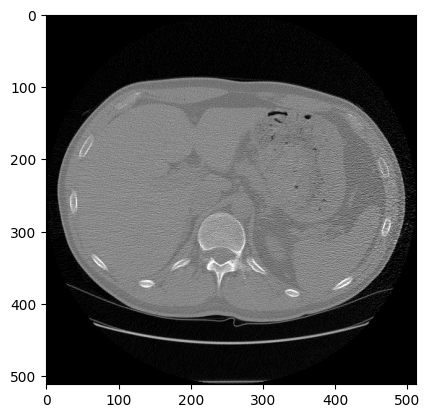

In [ ]:
plt.imshow(ct_scan_clip[0, :, :], cmap='gray')

In [ ]:
itkimage.GetSpacing(), itkimage.GetOrigin(), itkimage.GetDirection()

((0.7617189884185791, 0.7617189884185791, 2.5),
 (-198.100006, -195.0, -335.209991),
 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))

In [ ]:
xyztup = namedtuple('xyztup', ['x', 'y', 'z'])

In [ ]:
xyztup(*itkimage.GetSpacing())

xyztup(x=0.7617189884185791, y=0.7617189884185791, z=2.5)

In [ ]:
tuple([slice(1, 3), slice(1, 3), slice(1, 3)])

(slice(1, 3, None), slice(1, 3, None), slice(1, 3, None))

In [ ]:
train[0][0][..., tuple([slice(1, 3), slice(1, 3), slice(1, 3)])]

tensor([], size=(0, 2, 2, 48))

In [ ]:
import plotly.graph_objects as go

def make_voxel_fig(nodule):
  x1 = np.arange(0, nodule.shape[0])
  y1 = np.arange(0, nodule.shape[1])
  z1 = np.arange(0, nodule.shape[2])

  X, Y, Z = np.meshgrid(x1, y1, z1)

  fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=nodule.flatten(),
    isomin=-1.0,
    isomax=0.1,
    opacity=0.1,
  ))

  fig.show()

In [ ]:
make_voxel_fig(np.array(train[0][0])[0])

In [ ]:
def make_slice_fig(scan):
  row, col = (scan.shape[0] // 7)+1, 7
  rem = row*col - scan.shape[0]
  fig, axs = plt.subplots(row, col, figsize=(10, 1*(scan.shape[0] // 7)+1))

  for i in range(0, scan.shape[0]):
    axs[i // 7][i % 7].imshow(scan[i, :, :], cmap='gray')
    axs[i // 7][i % 7].axis('off')

  if rem > 0:
    for i in range(1, rem+1):
      axs[row-1][-1*i].axis('off')

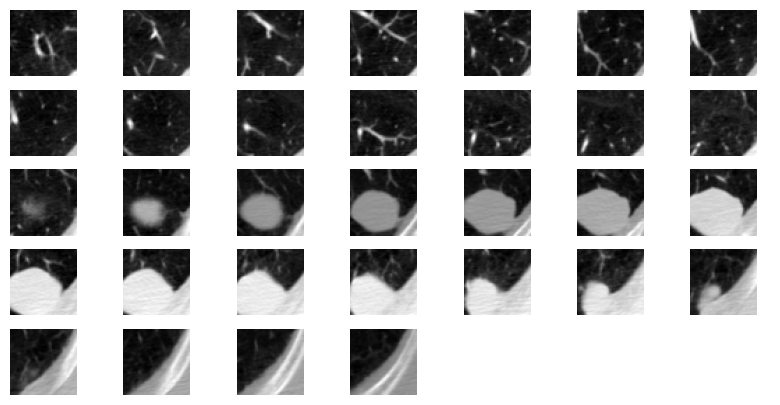

In [ ]:
make_slice_fig(np.array(train[0][0])[0])